# Northwind Microsoft Database Project by _Luigi Fiori_

We'll be working with the Northwind database: a free, open-source dataset created by Microsoft containing data from a fictional company. Here's the schema for the Northwind database.

We'll be gathering information from a real-world database and use our knowledge of statistical analysis and hypothesis testing to generate analytical insights that can be of value to the company.

# Importing needed libraries

In [1]:
ls

 Volume in drive C is OS
 Volume Serial Number is D816-28B0

 Directory of C:\Users\luigi\FlatironSchool\Module03\Project_Mod_03\dsc-mod-3-project-online-ds-pt-051319

17/09/2019  18:22    <DIR>          .
17/09/2019  18:22    <DIR>          ..
14/09/2019  13:12                29 .gitignore
14/09/2019  15:13    <DIR>          .ipynb_checkpoints
14/09/2019  13:12                93 .learn
14/09/2019  13:12           526,610 adventureworks2008_schema.gif
14/09/2019  13:12             1,849 CONTRIBUTING.md
14/09/2019  13:12         2,930,391 halfway-there.gif
14/09/2019  13:12             1,371 LICENSE.md
17/09/2019  18:22           210,208 Mod_03 Project_2 Luigi Fiori.ipynb
14/09/2019  13:12            78,531 module3_project_rubric.pdf
14/09/2019  13:12            96,050 Northwind_ERD.png
14/09/2019  13:12            96,271 Northwind_ERD_updated.png
14/09/2019  13:12           290,816 Northwind_small.sqlite
14/09/2019  13:12             5,085 README.md
              12 File(s)      4,237,

In [2]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy.stats as stats

## Connect to SQL Database

In [3]:
conn = sqlite3.Connection('Northwind_small.sqlite')
cur = conn.cursor()

## Querying Database

In [4]:
cur.execute("""SELECT ProductID, ProductName, UnitPrice, Quantity, Discount
               FROM Product
               JOIN OrderDetail
               USING(UnitPrice)
               """)
df = pd.DataFrame(cur.fetchall()) #Take results and create dataframe
df.columns = [i[0] for i in cur.description]
df.head()

,ProductId,ProductName,UnitPrice,Quantity,Discount
0,1,Chai,18.0,2,0.00
1,1,Chai,18.0,3,0.00
2,1,Chai,18.0,4,0.00
3,1,Chai,18.0,4,0.25
4,1,Chai,18.0,5,0.20


# EDA

###### Let's analise the dataframe created to check number of columns, rows and size.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 5 columns):
ProductId      2458 non-null int64
ProductName    2458 non-null object
UnitPrice      2458 non-null float64
Quantity       2458 non-null int64
Discount       2458 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 96.1+ KB


Check presence of missing values.

In [6]:
df.isnull().sum()

ProductId      0
ProductName    0
UnitPrice      0
Quantity       0
Discount       0
dtype: int64

We wanna now check if there are outliers present in our data set.

In [7]:
df.describe()

,ProductId,UnitPrice,Quantity,Discount
count,2458.000000,2458.000000,2458.000000,2458.000000
mean,39.437347,23.460460,23.815297,0.058035
std,22.911012,25.372515,19.473453,0.085474
min,1.000000,2.500000,1.000000,0.000000
25%,21.000000,12.500000,10.000000,0.000000
50%,39.000000,18.000000,20.000000,0.000000
75%,60.000000,25.890000,30.000000,0.100000
max,77.000000,263.500000,130.000000,0.250000


# 1st question

Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

In [8]:
disc = df[df['Discount'] != 0].groupby('ProductId')['Quantity'].mean()
disc.head()

ProductId
1    27.846154
2    24.294118
3    20.000000
4    30.875000
5    30.500000
Name: Quantity, dtype: float64

In [9]:
no_disc = df[df['Discount'] == 0].groupby('ProductId')['Quantity'].mean()
no_disc.head()

ProductId
1    18.250000
2    17.357143
3    26.000000
4    13.833333
5    29.333333
Name: Quantity, dtype: float64

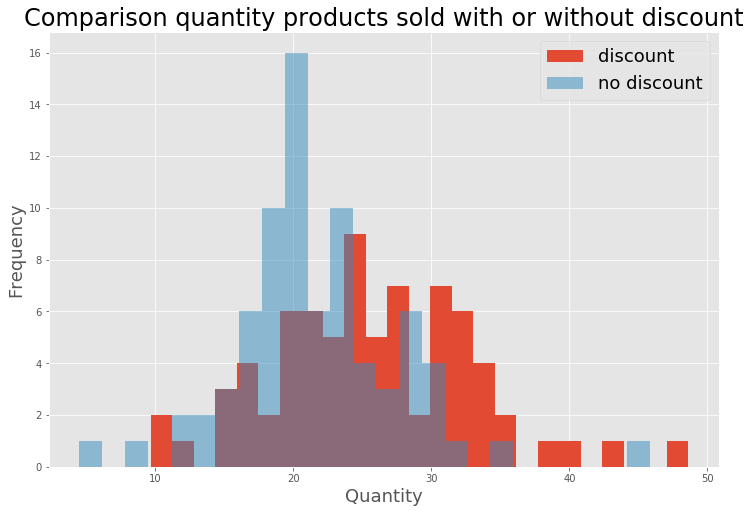

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.hist(disc, label = 'discount', bins = 25)
plt.hist(no_disc, label = 'no discount', alpha = .5, bins = 25)
plt.title('Comparison quantity products sold with or without discount', fontsize = 24)
plt.xlabel('Quantity', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

In [11]:
mean_diff_quant = np.mean(disc) - np.mean(no_disc)
mean_diff_quant

4.101095726033183

After a first look at the histogram and at the mean difference between quantity ordered with or without discount applied, we are not yet able to get a valuable answer.
In the next step we gonna perform an  hipothesis test to check if there's statistical difference between those quantities, i.e we want to know if the mean difference found is due to random chance or not.

# Defining Null and Alternative Hipothesis

Considering that we wanna observe if the quantity sold discounted is greater than the quantity sold not discounted we'll perform a **_One Tail Test_**.


**H_null** = qt. discounted sold <= qt. not discounted sold

**H_alt**  = qt. discounted sold > qt. not discounted sold

# Monte Carlo Simulations

Our data don't seem normally distributed, for this reason we'll use Monte Carlo Simulations that is a non-parametric test.

In [12]:
disc = df[df['Discount'] != 0]['Quantity']
no_disc = df[df['Discount'] == 0]['Quantity']

In [13]:
frames = [disc,no_disc]
all_data = pd.concat(frames)

In [14]:
type(all_data)

pandas.core.series.Series

In [15]:
df1 = pd.DataFrame({'all_data' : all_data})
df1.head()

,all_data
3,4
4,5
8,8
12,10
13,15


In [16]:
len(disc), len(no_disc), len(all_data)

(961, 1497, 2458)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


Text(0.5, 1.0, '10**4 samples - p-value: 0.0')

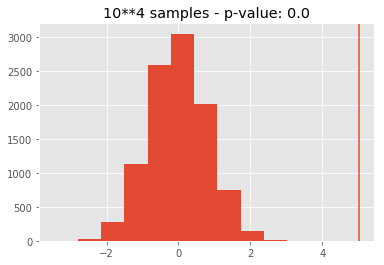

In [17]:
mean_diff_quant = np.mean(disc) - np.mean(no_disc)
sample_diff = []
counter = 0

for i in range(10**4):
    if i % 1000 == 0:
        print(i)
    #Generate sample for discount
    sample_disc = df1.sample(n=len(disc), replace=False)
    #Generate sample no_discount
    sample_no_disc = df1.drop(sample_disc.index, axis = 0)
    sample_mean_diff = sample_disc['all_data'].mean() - sample_no_disc['all_data'].mean()
    sample_diff.append(sample_mean_diff)
    if sample_mean_diff < mean_diff_quant:
        counter += 1
    
plt.hist(sample_diff)
   
plt.axvline(mean_diff_quant)
   
plt.title(f'10**4 samples - p-value: {1- counter/10**4}')

# Welch's Test

As a sanity check we gonna perform a Welch's Test that is commonly used in the industry for normal distributions having different mean.

In [18]:
stats.ttest_ind(disc, no_disc, equal_var= False)

Ttest_indResult(statistic=6.0192242098850555, pvalue=2.130356906716645e-09)

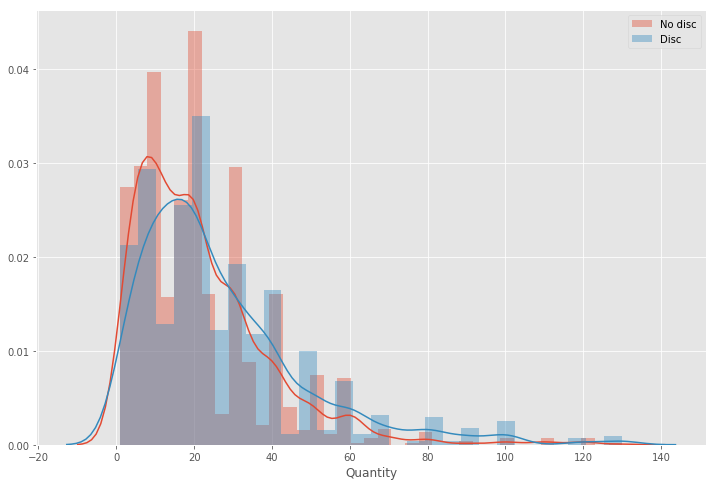

In [19]:
plt.figure(figsize=(12,8))

sns.distplot(no_disc, label = ('No disc'))
sns.distplot(disc, label= ('Disc'))
plt.legend()

# Effect Size

## Cohen's $d$

Cohen’s D is one of the most common ways to measure effect size.  As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable. 

The basic formula to calculate Cohen’s $d$ is:


In [20]:
def Cohen_d(group1, group2):

    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    return d

In [21]:
Cohen_d(disc, no_disc)

0.26000933599626364

As we can see from the d result obtained the effect size of 0.26 result being small.

# Check statistically significant difference at different levels of discount

In [22]:
cur.execute("""SELECT ProductID, ProductName, UnitPrice, Quantity, Discount, Unitprice*quantity as Revenue
               FROM Product
               JOIN OrderDetail
               USING(UnitPrice)
               """)
df = pd.DataFrame(cur.fetchall()) #Take results and create dataframe
df.columns = [i[0] for i in cur.description]
df.head()

,ProductId,ProductName,UnitPrice,Quantity,Discount,Revenue
0,1,Chai,18.0,2,0.00,36.0
1,1,Chai,18.0,3,0.00,54.0
2,1,Chai,18.0,4,0.00,72.0
3,1,Chai,18.0,4,0.25,72.0
4,1,Chai,18.0,5,0.20,90.0


In [23]:
disc = df['Discount'].value_counts()
disc

0.00    1497
0.05     209
0.20     198
0.25     191
0.15     184
0.10     170
0.03       3
0.01       2
0.02       2
0.04       1
0.06       1
Name: Discount, dtype: int64

don't use all the discounts

In [24]:
no_discount = df[df['Discount']==0]['Quantity']

for x in ([ 0.05, 0.1, 0.15, 0.2, 0.25]):
    
    discount = df[df['Discount']==x]['Quantity']
    st, p = stats.ttest_ind(discount, no_disc, equal_var= False)
    print(f'p-value: {p},  discount: {x}' )

p-value: 0.00020242644293690925,  discount: 0.05
p-value: 0.059408472241625404,  discount: 0.1
p-value: 0.0006408369853993879,  discount: 0.15
p-value: 0.00046767005488145745,  discount: 0.2
p-value: 0.0006551534111424134,  discount: 0.25


Results are all statistically significant so we can reject the null hypotheses.

# 2nd QUESTION

There is a statistically significant difference on shipping time between different shipper companies?

In [25]:
cur.execute("""SELECT *
               FROM shipper
               """)
df = pd.DataFrame(cur.fetchall()) #Take results and create dataframe
df.columns = [i[0] for i in cur.description]
df.head()

,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [26]:
df['CompanyName'].unique()

array(['Speedy Express', 'United Package', 'Federal Shipping'],
      dtype=object)

In [27]:
order = pd.read_sql_query('''
                            SELECT *
                            FROM 'Order'
                            
                            
                        
                            ''', conn)

In [28]:
order.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [29]:
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")

for name in res:
    print(name[0])
        

Employee
Category
Customer
Shipper
Supplier
Order
Product
OrderDetail
CustomerCustomerDemo
CustomerDemographic
Region
Territory
EmployeeTerritory


In [30]:
for description in cur.description:
    print(description)

('Id', None, None, None, None, None, None)
('CompanyName', None, None, None, None, None, None)
('Phone', None, None, None, None, None, None)


In [31]:
dates1 = pd.read_sql_query('''
                            SELECT companyname, [order].Id, Quantity, OrderDate, shippedDate, ShipCountry
                            
                            FROM [order]
                            JOIN orderdetail
                            
                            ON [Order].Id = orderdetail.orderid
                            JOIN shipper
                            ON shipper.id = [order].shipvia
                            
                        
                            ''', conn)

In [32]:
dates1.isnull().sum()

CompanyName     0
Id              0
Quantity        0
OrderDate       0
ShippedDate    73
ShipCountry     0
dtype: int64

In [33]:
dates1.dropna(subset = ['ShippedDate'], inplace=True)
dates1.head()

,CompanyName,Id,Quantity,OrderDate,ShippedDate,ShipCountry
0,Federal Shipping,10248,12,2012-07-04,2012-07-16,France
1,Federal Shipping,10248,10,2012-07-04,2012-07-16,France
2,Federal Shipping,10248,5,2012-07-04,2012-07-16,France
3,Speedy Express,10249,9,2012-07-05,2012-07-10,Germany
4,Speedy Express,10249,40,2012-07-05,2012-07-10,Germany


In [34]:
from datetime import datetime
date_format = "%Y-%m-%d"
a = []
b = []
for x in dates1['OrderDate']:
    a.append(datetime.strptime(x, date_format))
for y in dates1['ShippedDate']:
    b.append(datetime.strptime(y, date_format))


In [35]:
a_arr = np.array(a)

In [36]:
b_arr = np.array(b)

In [37]:
time_ship = abs(a_arr - b_arr)
type(time_ship)

numpy.ndarray

In [38]:
x = pd.to_timedelta(time_ship)

In [39]:
x.days

Int64Index([12, 12, 12,  5,  5,  4,  4,  4,  7,  7,
            ...
             3,  3,  3,  3,  3,  3,  3,  3,  2,  2],
           dtype='int64', length=2082)

In [40]:
time_df = pd.DataFrame(x.days)
time_df.head()

,0
0,12
1,12
2,12
3,5
4,5


In [41]:
time_df.columns= ['DaysDelivery']

In [42]:
result = pd.concat([dates1, time_df], axis=1)
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2110
Data columns (total 7 columns):
CompanyName     2082 non-null object
Id              2082 non-null float64
Quantity        2082 non-null float64
OrderDate       2082 non-null object
ShippedDate     2082 non-null object
ShipCountry     2082 non-null object
DaysDelivery    2082 non-null float64
dtypes: float64(3), object(4)
memory usage: 131.1+ KB


In [43]:
result.dropna(subset=['CompanyName'], inplace=True)

In [44]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2110
Data columns (total 7 columns):
CompanyName     2082 non-null object
Id              2082 non-null float64
Quantity        2082 non-null float64
OrderDate       2082 non-null object
ShippedDate     2082 non-null object
ShipCountry     2082 non-null object
DaysDelivery    2067 non-null float64
dtypes: float64(3), object(4)
memory usage: 130.1+ KB


In [45]:
result.dropna(subset=['DaysDelivery'], inplace=True)

In [46]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2081
Data columns (total 7 columns):
CompanyName     2067 non-null object
Id              2067 non-null float64
Quantity        2067 non-null float64
OrderDate       2067 non-null object
ShippedDate     2067 non-null object
ShipCountry     2067 non-null object
DaysDelivery    2067 non-null float64
dtypes: float64(3), object(4)
memory usage: 129.2+ KB


In [47]:
result.head()

,CompanyName,Id,Quantity,OrderDate,ShippedDate,ShipCountry,DaysDelivery
0,Federal Shipping,10248.0,12.0,2012-07-04,2012-07-16,France,12.0
1,Federal Shipping,10248.0,10.0,2012-07-04,2012-07-16,France,12.0
2,Federal Shipping,10248.0,5.0,2012-07-04,2012-07-16,France,12.0
3,Speedy Express,10249.0,9.0,2012-07-05,2012-07-10,Germany,5.0
4,Speedy Express,10249.0,40.0,2012-07-05,2012-07-10,Germany,5.0


In [48]:
federal_ship = result[result['CompanyName'] == 'Federal Shipping']['DaysDelivery']

In [49]:
speedy_ship = result[result['CompanyName'] == 'Speedy Express']['DaysDelivery']

In [50]:
united_ship = result[result['CompanyName'] == 'United Package']['DaysDelivery']

In [51]:
st, p = stats.ttest_ind(federal_ship,speedy_ship, equal_var= False)
print(p)

0.005757156239210056


In [52]:
st, p = stats.ttest_ind(federal_ship,united_ship, equal_var= False)
print(p)

2.0108242104602806e-05


In [53]:
st, p = stats.ttest_ind(speedy_ship,united_ship, equal_var= False)
print(p)

0.18103081541509275


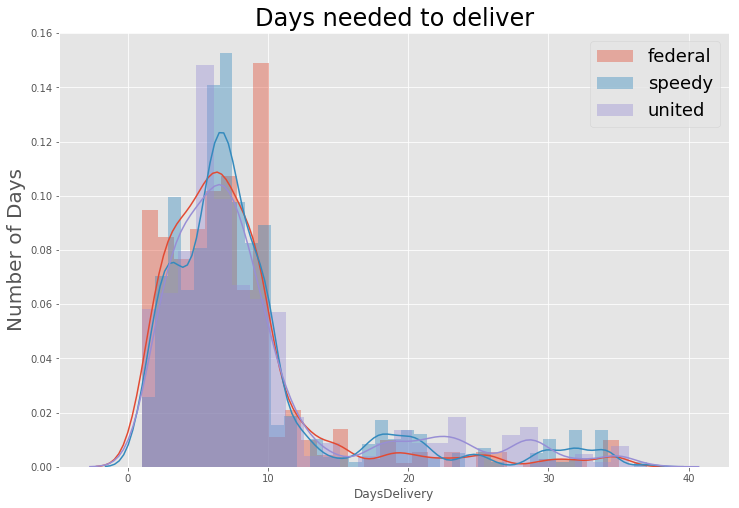

In [54]:
plt.figure(figsize=(12,8))
sns.distplot(federal_ship, label='federal')
sns.distplot(speedy_ship, label='speedy')
sns.distplot(united_ship, label='united')
plt.legend(fontsize = 18)
plt.title('Days needed to deliver', fontsize = 24)
plt.ylabel('Number of Days', fontsize = 20);

In [55]:
cur.execute("""SELECT ProductID, ProductName, UnitPrice, Quantity, Discount, Unitprice*quantity as Revenue
               FROM Product
               JOIN OrderDetail
               USING(UnitPrice)
               """)
df = pd.DataFrame(cur.fetchall()) #Take results and create dataframe
df.columns = [i[0] for i in cur.description]
df.head()

,ProductId,ProductName,UnitPrice,Quantity,Discount,Revenue
0,1,Chai,18.0,2,0.00,36.0
1,1,Chai,18.0,3,0.00,54.0
2,1,Chai,18.0,4,0.00,72.0
3,1,Chai,18.0,4,0.25,72.0
4,1,Chai,18.0,5,0.20,90.0


In [59]:
df.groupby('ProductName')['Discount'].unique().head()

ProductName
Alice Mutton                     [0.0, 0.05, 0.1, 0.25, 0.2]
Aniseed Syrup              [0.0, 0.1, 0.2, 0.05, 0.15, 0.25]
Boston Crab Meat                 [0.0, 0.2, 0.1, 0.05, 0.15]
Camembert Pierrot    [0.06, 0.15, 0.0, 0.05, 0.1, 0.25, 0.2]
Carnarvon Tigers                 [0.1, 0.25, 0.0, 0.15, 0.2]
Name: Discount, dtype: object

In [61]:
cur.execute("""SELECT *
               FROM Category
               """)
df = pd.DataFrame(cur.fetchall()) #Take results and create dataframe
df.columns = [i[0] for i in cur.description]
df

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish
